In [1]:
import os
import numpy as np

# Directory where extracted features are saved
features_dir = r"D:\Minor Project Ayan\data\C3D_Features"

# Output files for binary classification
features_output = r"D:\Minor Project Ayan\data\X_train.npy"
labels_output = r"D:\Minor Project Ayan\data\y_train.npy"

# Define the class that represents normal activity
normal_class = "Normal"

X_train = []
y_train = []

# Loop over all .npy feature files
for file_name in os.listdir(features_dir):
    if not file_name.endswith("_features.npy"):
        continue

    label_name = file_name.split("_")[0]

    # Binary label assignment
    if label_name == normal_class:
        label = 0  # Normal
    else:
        label = 1  # Anomaly

    feature_path = os.path.join(features_dir, file_name)
    features = np.load(feature_path, allow_pickle=True)
    X_train.append(features)
    y_train.append(label)

# Convert to numpy arrays
X_train = np.array(X_train, dtype=object)  # keep as object if variable length
y_train = np.array(y_train)

# Save them
np.save(features_output, X_train)
np.save(labels_output, y_train)

print(f"[INFO] Saved {len(X_train)} feature arrays and binary labels.")


[INFO] Saved 606 feature arrays and binary labels.


In [1]:
import numpy as np
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard

# Load the data
X_train = np.load('D:/Minor Project Ayan/data/X_train.npy', allow_pickle=True)
y_train = np.load('D:/Minor Project Ayan/data/y_train.npy', allow_pickle=True)

# Convert labels to binary: 0 = Stealing, 1 = Vandalism
# (This is already done, so you don't need to modify y_train here if it's already correct)

# Ensure proper dtype
X_train = np.array(X_train.tolist(), dtype=np.float32)  # Convert from object dtype
y_train = np.array(y_train, dtype=np.int64)

print(f"X_train shape: {X_train.shape}, dtype: {X_train.dtype}")
print(f"y_train shape: {y_train.shape}, unique values: {np.unique(y_train)}")

# Define the model
model = Sequential([
    LSTM(128, input_shape=(32, 512), return_sequences=True),
    Dropout(0.3),
    LSTM(64),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary output
])

# Compile the model
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

model.summary()

# Callbacks
checkpoint_dir = "D:/Minor Project Ayan/models/"
os.makedirs(checkpoint_dir, exist_ok=True)

callbacks = [
    ModelCheckpoint(
        filepath=os.path.join(checkpoint_dir, 'best_model.h5'),  # Save as .h5
        save_best_only=True,
        monitor='val_loss',
        verbose=1
    ),
    EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True,
        verbose=1
    ),
    TensorBoard(
        log_dir=os.path.join(checkpoint_dir, 'logs'),
        histogram_freq=1
    )
]

# Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=60,
    batch_size=8,
    callbacks=callbacks,
    verbose=1
)

# Save final model as .h5
model.save(os.path.join(checkpoint_dir, 'final_model.h5'))  # Final model as .h5
print("✅ Model training complete and saved.")


X_train shape: (606, 32, 512), dtype: float32
y_train shape: (606,), unique values: [0 1]


c:\Users\rachi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 32, 128)        │       328,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 381,825 (1.46 MB)

 Trainable params: 381,825 (1.46 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/60
56/61 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7146 - loss: 0.5994
Epoch 1: val_loss improved from inf to 0.16910, saving model to D:/Minor Project Ayan/models/best_model.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.7192 - loss: 0.5956 - val_accuracy: 1.0000 - val_loss: 0.1691
Epoch 2/60
60/61 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7671 - loss: 0.5369
Epoch 2: val_loss did not improve from 0.16910
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7675 - loss: 0.5362 - val_accuracy: 1.0000 - val_loss: 0.1798
Epoch 3/60
59/61 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7775 - loss: 0.4887
Epoch 3: val_loss did not improve from 0.16910
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7777 - loss: 0.4890 - val_accuracy: 1.0000 - val_loss: 0.2509
Epoch 4/60
60/61 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8263 - loss: 0.4068
Epoch 4: val_loss improved from 0.16910 to 0.07526, saving model to D:/Minor Project Ayan/models/best_model.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8262 - loss: 0.4060 - val_accuracy: 0.9508 - val_loss: 0.0753
Epoch 5/60
56/61 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8736 - loss: 0.2873
Epoch 5: val_loss did not improve from 0.07526
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8718 - loss: 0.2919 - val_accuracy: 0.9918 - val_loss: 0.1238
Epoch 6/60
57/61 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8829 - loss: 0.3178
Epoch 6: val_loss did not improve from 0.07526
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8832 - loss: 0.3176 - val_accuracy: 0.9836 - val_loss: 0.1677
Epoch 7/60
56/61 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8986 - loss: 0.3056
Epoch 7: val_loss did not improve from 0.07526
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8962 - loss: 0.3057 - val_accuracy: 0.9344 - val_loss: 0.1159
Epoch 8/60
59/61 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8839 - loss: 0.2822
Epoch 8: val_loss improved from 0.07526 to 0.06551, saving 

61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8837 - loss: 0.2829 - val_accuracy: 1.0000 - val_loss: 0.0655
Epoch 9/60
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8667 - loss: 0.3256
Epoch 9: val_loss did not improve from 0.06551
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8670 - loss: 0.3250 - val_accuracy: 0.9590 - val_loss: 0.1341
Epoch 10/60
59/61 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8679 - loss: 0.3081
Epoch 10: val_loss did not improve from 0.06551
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8687 - loss: 0.3069 - val_accuracy: 0.8115 - val_loss: 0.3694
Epoch 11/60
57/61 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8602 - loss: 0.3208
Epoch 11: val_loss improved from 0.06551 to 0.06000, saving model to D:/Minor Project Ayan/models/best_model.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8616 - loss: 0.3184 - val_accuracy: 0.9918 - val_loss: 0.0600
Epoch 12/60
57/61 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9127 - loss: 0.2438
Epoch 12: val_loss did not improve from 0.06000
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9115 - loss: 0.2451 - val_accuracy: 0.9426 - val_loss: 0.1378
Epoch 13/60
60/61 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8973 - loss: 0.2701
Epoch 13: val_loss did not improve from 0.06000
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8970 - loss: 0.2704 - val_accuracy: 0.9672 - val_loss: 0.1103
Epoch 14/60
58/61 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9173 - loss: 0.2020
Epoch 14: val_loss did not improve from 0.06000
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9172 - loss: 0.2033 - val_accuracy: 0.9262 - val_loss: 0.1483
Epoch 15/60
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9608 - loss: 0.1452
Epoch 15: val_loss did not improve from 0.06000
61/6

✅ Model training complete and saved.


X_train_split shape: (484, 32, 512), dtype: float32
X_val_split shape: (122, 32, 512), dtype: float32
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Confusion Matrix:
[[  3  17]
 [  1 101]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.15      0.25        20
           1       0.86      0.99      0.92       102

    accuracy                           0.85       122
   macro avg       0.80      0.57      0.58       122
weighted avg       0.84      0.85      0.81       122

AUC-ROC Score: 0.9029411764705882


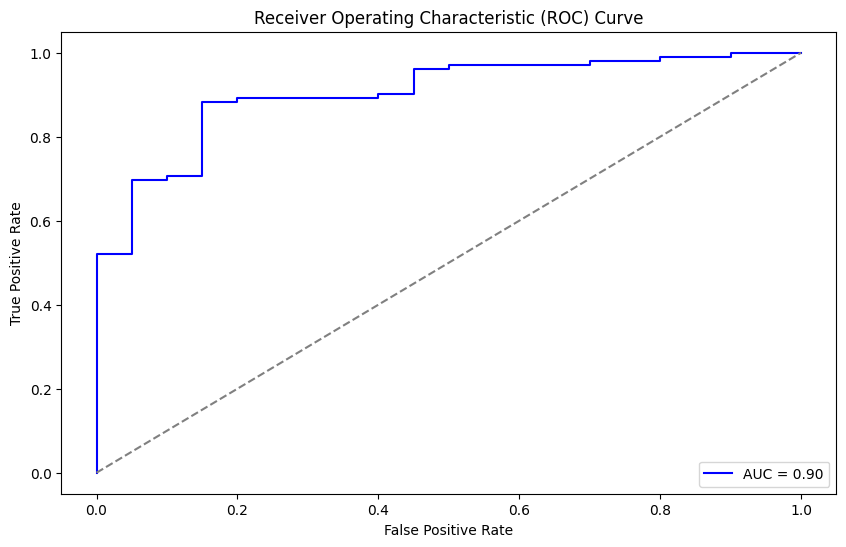

AUC-PR Score: 0.9793542878275259


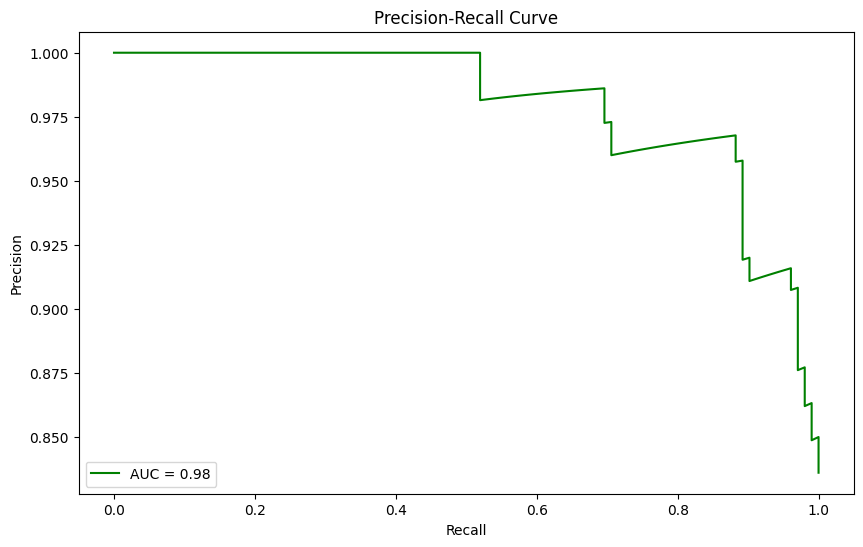

C:\Users\rachi\AppData\Local\Temp\ipykernel_24184\3614913377.py:67: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([precision, recall], vert=True, patch_artist=True, labels=['Precision', 'Recall'])


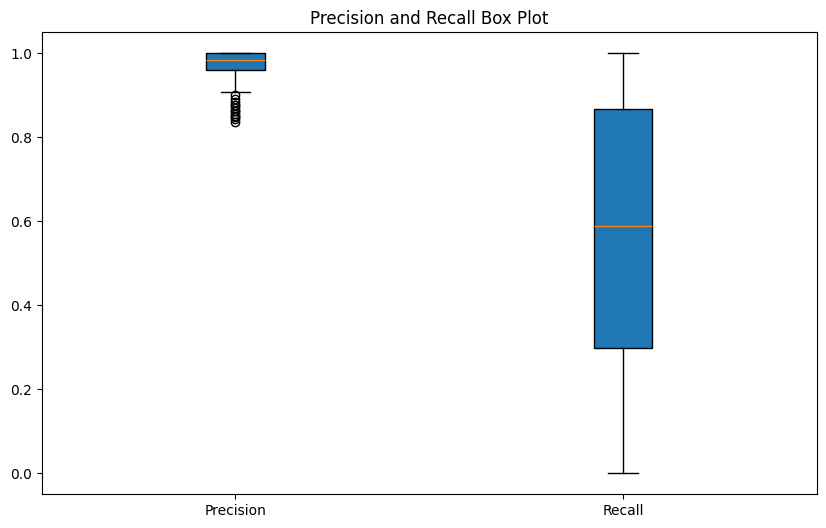

In [6]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt
from keras.models import load_model
from sklearn.model_selection import train_test_split

# Load your data (assuming X_train and y_train are already prepared)
# Make sure your data is in the correct dtype (float32)
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Ensure that X_train_split and X_val_split are of type float32
X_train_split = np.array(X_train_split, dtype=np.float32)
X_val_split = np.array(X_val_split, dtype=np.float32)

# Verify the shape and dtype
print(f"X_train_split shape: {X_train_split.shape}, dtype: {X_train_split.dtype}")
print(f"X_val_split shape: {X_val_split.shape}, dtype: {X_val_split.dtype}")

# Load the trained model
model = load_model('D:/Minor Project Ayan/models/best_model.keras')

# Predict probabilities for validation data
y_pred_prob = model.predict(X_val_split)

# Convert probabilities to class predictions (threshold 0.5)
y_pred = (y_pred_prob > 0.5).astype(int)

# Generate confusion matrix
cm = confusion_matrix(y_val_split, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification report
print("\nClassification Report:")
print(classification_report(y_val_split, y_pred))

# Calculate AUC - ROC
roc_auc = roc_auc_score(y_val_split, y_pred_prob)
print(f"AUC-ROC Score: {roc_auc}")

# ROC curve
fpr, tpr, _ = roc_curve(y_val_split, y_pred_prob)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_val_split, y_pred_prob)
pr_auc = auc(recall, precision)  # Calculate AUC for Precision-Recall curve
print(f"AUC-PR Score: {pr_auc}")

plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='green', label=f'AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

# Box plot for Precision and Recall
plt.figure(figsize=(10, 6))
plt.boxplot([precision, recall], vert=True, patch_artist=True, labels=['Precision', 'Recall'])
plt.title('Precision and Recall Box Plot')
plt.show()
